For  20.0  seconds, move forward :
Left speed :  10  - Right speed:  10 

For  15.7  seconds, turn wheels :
Left speed :  -1  - Right speed:  1 

For  30.0  seconds, move forward :
Left speed :  10  - Right speed:  10 

For  15.7  seconds, turn wheels :
Left speed :  1  - Right speed:  -1 

For  10.0  seconds, move forward :
Left speed :  10  - Right speed:  10 

For  7.9  seconds, turn wheels :
Left speed :  -1  - Right speed:  1 

For  28.3  seconds, move forward :
Left speed :  10  - Right speed:  10 



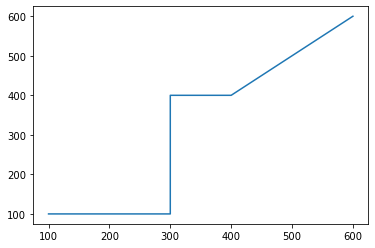

In [13]:
'''
MOTION CONTROL v0.1
 -- defined move and turn functions

inputs:
    An np.array of trajectory points
    
outputs:
    Connexion to thymio ?
    A set of movements ?
    Commands ?
'''

import numpy as np
from matplotlib import pyplot as plt

# constants
ROBOT_WIDTH = 20

class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.norm2 = np.sqrt(x**2 + y**2)
        self.angle = np.arctan2(y,x)
        
    def dist(self, p2):
        return np.sqrt((self.x-p2.x)**2 + (self.y-p2.y)**2)
        
class Trajectory:
    def __init__(self, points):
        self.points = np.array(points)
        self.total_len = 0
        self.x = []
        self.y = []
        for idx in range(len(points)):
            self.x.append(points[idx].x)
            self.y.append(points[idx].y)
            if idx < len(points) - 1:
                self.total_len += points[idx].dist(points[idx+1])
                
def move(p1, p2, movespeed=10):
    movedist = p1.dist(p2)
    movetime = movedist/movespeed
    for t in range(int(movetime)):
        l_wheel = movespeed
        r_wheel = movespeed
    print('For ', round(movetime,1), ' seconds, move forward :')
    print('Left speed : ', l_wheel, ' - Right speed: ', r_wheel, '\n')
    #stop
    l_wheel = 0
    r_wheel = 0
    
def turn(p0, p1, p2, turnspeed=1):
    vec1 = Point(p1.x - p0.x, p1.y - p0.y)
    vec2 = Point(p2.x - p1.x, p2.y - p1.y)
    
    angle = vec2.angle-vec1.angle
    turndist = ROBOT_WIDTH/2 * angle
    turntime = abs(turndist)/turnspeed
    
    for t in range(int(turntime)):
        l_wheel = -turnspeed * int(angle/abs(angle))
        r_wheel =  turnspeed * int(angle/abs(angle))
    print('For ', round(turntime,1), ' seconds, turn wheels :')
    print('Left speed : ', l_wheel, ' - Right speed: ', r_wheel, '\n')
    #stop
    l_wheel = 0
    r_wheel = 0

    
#________________________________vvv inputs vvv__________________________________#

traj = Trajectory([Point(100,100),
                   Point(300,100),
                   Point(300,400),
                   Point(400,400),
                   Point(600,600)])

#_________________________________^^^ inputs ^^^________________________________#



for i in range(len(traj.points)-1):
    
    # move forward from p0 to p1
    move(traj.points[i], traj.points[i+1])
    
    if i < len(traj.points)-2:
        # pivot from p01 to p12
        turn(traj.points[i], traj.points[i+1], traj.points[i+2])
        
plt.plot(traj.x, traj.y)

For  20.0  seconds, move forward :
Left speed :  10  - Right speed:  10 

For  15.7  seconds, turn wheels :
Left speed :  -1  - Right speed:  1 

For  30.0  seconds, move forward :
Left speed :  10  - Right speed:  10 

For  15.7  seconds, turn wheels :
Left speed :  1  - Right speed:  -1 

For  10.0  seconds, move forward :
Left speed :  10  - Right speed:  10 

For  7.9  seconds, turn wheels :
Left speed :  -1  - Right speed:  1 

For  28.3  seconds, move forward :
Left speed :  10  - Right speed:  10 



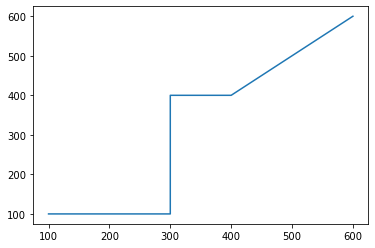

In [3]:
'''
MOTION CONTROL v0.2
 -- clarified the functions with comments and added returned values

inputs:
    An np.array of trajectory points
    
outputs:
    Connexion to thymio ?
    A set of movements ?
    Commands ?
'''

import numpy as np
from matplotlib import pyplot as plt

# constants
ROBOT_WIDTH = 20

class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.norm2 = np.sqrt(x**2 + y**2)
        self.angle = np.arctan2(y,x)
        
    def dist(self, p2):
        return np.sqrt((self.x-p2.x)**2 + (self.y-p2.y)**2)
        
class Trajectory:
    def __init__(self, points):
        self.points = np.array(points)
        self.total_len = 0
        self.x = []
        self.y = []
        for idx in range(len(points)):
            self.x.append(points[idx].x)
            self.y.append(points[idx].y)
            if idx < len(points) - 1:
                self.total_len += points[idx].dist(points[idx+1])
                
                
def move(p1, p2, move_speed=10):
    ''' 
    Move function: gives instructions for the robot to move from a point A to B
    Inputs:
        p1 - coordinates of the starting point
        p2 - coordinates of the goal point
        move_speed - desired speed of the robot
    Outputs:
        move_time - total time of the forward movement
        l_wheel - speed for left motor
        r_wheel - speed for right motor
    '''
    move_dist = p1.dist(p2)
    move_time = move_dist/move_speed
    l_wheel = move_speed
    r_wheel = move_speed
    
    print('For ', round(move_time,1), ' seconds, move forward :')
    print('Left speed : ', l_wheel, ' - Right speed: ', r_wheel, '\n')
    return move_time, l_wheel, r_wheel
    
def pivot(p0, p1, p2, pivot_speed=1):
    ''' 
    Pivot function: gives instructions for the robot to pivot using 3 points
    Inputs:
        p0 - coordinates of the previous point (where did the robot come from?)
        p1 - coordinates of the current point (where is the robot now?)
        p2 - coordinates of the next point (where is the robot going?)
        pivot_speed - desired speed of pivot
    Outputs:
        move_time - total time of the pivot movement
        l_wheel - speed for left motor
        r_wheel - speed for right motor
        
    '''
    vec1 = Point(p1.x - p0.x, p1.y - p0.y)
    vec2 = Point(p2.x - p1.x, p2.y - p1.y)
    pivot_angle = vec2.angle-vec1.angle
    
    pivot_dist = abs(ROBOT_WIDTH/2 * pivot_angle)
    pivot_time = pivot_dist/pivot_speed
    l_wheel = -pivot_speed * int(pivot_angle/abs(pivot_angle))
    r_wheel =  pivot_speed * int(pivot_angle/abs(pivot_angle))
    
    print('For ', round(pivot_time,1), ' seconds, turn wheels :')
    print('Left speed : ', l_wheel, ' - Right speed: ', r_wheel, '\n')
    return pivot_time, l_wheel, r_wheel
    

    
#________________________________vvv inputs vvv__________________________________#

traj = Trajectory([Point(100,100),
                   Point(300,100),
                   Point(300,400),
                   Point(400,400),
                   Point(600,600)])

#_________________________________^^^ inputs ^^^________________________________#



for i in range(len(traj.points)-1):
    
    # move forward from p0 to p1
    move(traj.points[i], traj.points[i+1])
    
    if i < len(traj.points)-2:
        # pivot from p01 to p12
        pivot(traj.points[i], traj.points[i+1], traj.points[i+2])
        
plt.plot(traj.x, traj.y)